<a href="https://colab.research.google.com/github/mars241/NLP_Natural-Language-Processing/blob/main/AAM_WCS_NLP_2_Stemming_%26_Lemmatizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🦾Challenge
Tu vas reprendre ton notebook de la quête précédente, puis effectuer les étapes ci-dessous.

1. A partir de ton texte déjà nettoyé, donc en minuscule, sans stopwords ni ponctuation, utilise un stemmer pour rendre le corpus de mots encore plus pertinent, puis utilise FreqDist. Le stemmer a-t-il permis de faire remonter des informations pertinentes en regroupant certains mots de même racine ?
2. A partir de ton texte déjà nettoyé, donc en minuscule, sans stopwords ni ponctuation, utilise un lemmatizer pour rendre le corpus de mots encore plus pertinent, puis utilise FreqDist. Le lemmatizer a-t-il permis de faire remonter des informations pertinentes en regroupant certains mots de même racine ?

/ ! \ Attention, pour cette seconde étape, repars du texte nettoyé, mais pas du texte après stemmer. Le but de cet exercice est de comparer les deux méthodes

Compare les deux méthodes : les mots avec les plus grandes valeurs dans le FreqDist sont-ils les mêmes ?
Partage le lien vers ton notebook en guise de solution au challenge.

Critères de validation
Le notebook est consultable pour toute personne disposant du lien fourni par l'élève.
NLTK et spacy sont utilisés pour réaliser le preprocessing du texte.
La comparaison entre stemmer et lemmatizer est effectuée.

# Objectifs
Les **deux techniques de pré-processing** très importantes : le stemming et le lemmatizing qui permèmetent de ***rassambler les mots de même racine, pour leurs donner plus de poids dans l'analyse***.

Comprendre **le stemming (tronquer quelques caratères en fin de mot)** et savoir l'implémenter en Python.

Comprendre **le lemmatizing (Analyse sémentique et gramaticale)** et savoir l'implémenter en Python.

In [ ]:
# 1) Importer le NLTK en mode des "modules les plus classiques et les dictionnaires anglais"
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
# Affecte le texte à une variable via un copier/coller dans ton notebook.

sentence = 'This is a story about dogs our canine pets Dogs are furry animals ! Ceci est une histoire de chiens nos animaux de compagnie. Les chiens sont des animaux à fourrure !'
print(sentence)

This is a story about dogs our canine pets Dogs are furry animals ! Ceci est une histoire de chiens nos animaux de compagnie. Les chiens sont des animaux à fourrure !


In [ ]:
# 1) A partir de ton texte déjà nettoyé, donc en minuscule, sans stopwords ni ponctuation, 
# utilise un stemmer pour rendre le corpus de mots encore plus pertinent, puis utilise FreqDist.

# 1.1) Mettre minuscule
sentence = sentence.lower() 
sentence

'this is a story about dogs our canine pets dogs are furry animals ! ceci est une histoire de chiens nos animaux de compagnie. les chiens sont des animaux à fourrure !'

In [ ]:
# 1.2) Enlever la ponctuation

import string # Importer le module correspondant
#string.punctuation #  Pour afficher la liste des ponctuations visés
for punctuation in string.punctuation:
    sentence = sentence.replace(punctuation, ' ') 

sentence

'this is a story about dogs our canine pets dogs are furry animals   ceci est une histoire de chiens nos animaux de compagnie  les chiens sont des animaux à fourrure  '

In [ ]:
# 1.3) Enlever les stops words 
nltk.download('stopwords') # téléchargement du pakage stop word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
# (...Suite) 1.3) Enlever les stops words 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
#  Afficher le stop words dans le repectoire anglais
stop_words = stopwords.words('english')

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#  Afficher le stop words dans le repectoire Français
stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [ ]:
# Pour enlever les tokens en Anglais
tokens = nltk.word_tokenize(sentence)

tokens_clean = []
for words in tokens:
  if words not in nltk.corpus.stopwords.words("english"):
    tokens_clean.append(words)

tokens_clean

['story',
 'dogs',
 'canine',
 'pets',
 'dogs',
 'furry',
 'animals',
 'ceci',
 'est',
 'une',
 'histoire',
 'de',
 'chiens',
 'nos',
 'animaux',
 'de',
 'compagnie',
 'les',
 'chiens',
 'sont',
 'des',
 'animaux',
 'à',
 'fourrure']

In [ ]:
# Pour enlever les tokens en Français
tokens = nltk.word_tokenize(sentence)

tokens_clean = []
for words in tokens:
  if words not in nltk.corpus.stopwords.words('french'):
    tokens_clean.append(words)

tokens_clean

['this',
 'is',
 'a',
 'story',
 'about',
 'dogs',
 'our',
 'canine',
 'pets',
 'dogs',
 'are',
 'furry',
 'animals',
 'ceci',
 'histoire',
 'chiens',
 'animaux',
 'compagnie',
 'chiens',
 'animaux',
 'fourrure']

In [74]:
# Couper le text en phrase (c'est tt le texte car plus de ponctuation dans ce dernier)
tokens_words= nltk.sent_tokenize(sentence)
tokens_words

['this is a story about dogs our canine pets dogs are furry animals   ceci est une histoire de chiens nos animaux de compagnie  les chiens sont des animaux à fourrure']

# Méthode1 du "SnowballStemmer"

In [ ]:
# ...Suite 3) utilise un stemmer pour rendre le corpus de mots encore plus pertinent, puis utilise FreqDist.
# ANGLAIS
# Le stemmer le plus connu en anglais est PorterStemmer. Ici nous allons utiliser 'SnowballStemmer' qui a l'avantage de gérer d'autres langues.
# Effectuons un premier essai avec un print de chaque stemming de token :

from nltk.stem import SnowballStemmer

stem_en = SnowballStemmer("english")
for word in nltk.word_tokenize(sentence):
  print(stem_en.stem(word))

this
is
a
stori
about
dog
our
canin
pet
dog
are
furri
anim
ceci
est
une
histoir
de
chien
nos
animaux
de
compagni
les
chien
sont
des
animaux
à
fourrur


In [ ]:
# Utilisons maintenant la compréhension du "SnowballStemmer" de liste afin de stocker les résultats dans une liste :
[stem_en.stem(word) for word in nltk.word_tokenize(sentence)]

['this',
 'is',
 'a',
 'stori',
 'about',
 'dog',
 'our',
 'canin',
 'pet',
 'dog',
 'are',
 'furri',
 'anim',
 'ceci',
 'est',
 'une',
 'histoir',
 'de',
 'chien',
 'nos',
 'animaux',
 'de',
 'compagni',
 'les',
 'chien',
 'sont',
 'des',
 'animaux',
 'à',
 'fourrur']

In [68]:
# ...Suite 3) ..., puis utilise FreqDist.
# Nous pouvons maintenant faire un FreqDist sur cette nouvelle liste de tokens, et avec la phrase complète :
sent_stem  = [stem_en.stem(word) for word in nltk.word_tokenize(sentence)]
full_vocab = nltk.FreqDist(sent_stem)
full_vocab

FreqDist({'animal': 3, 'de': 3, 'dog': 2, 'chien': 2, 'this': 1, 'is': 1, 'a': 1, 'story': 1, 'about': 1, 'our': 1, ...})

In [ ]:
# ...Suite 3) utilise un stemmer pour rendre le corpus de mots encore plus pertinent, puis utilise FreqDist.
# FRANCAIS
# Le stemmer le plus connu en anglais est PorterStemmer. Ici nous allons utiliser 'SnowballStemmer' qui a l'avantage de gérer d'autres langues.
# Effectuons un premier essai avec un print de chaque stemming de token :

from nltk.stem import SnowballStemmer

stem_en = SnowballStemmer("french")
for word in nltk.word_tokenize(sentence):
  print(stem_en.stem(word))

this
is
a
story
about
dog
our
canin
pet
dog
are
furry
animal
cec
est
une
histoir
de
chien
nos
animal
de
compagn
le
chien
sont
de
animal
à
fourrur


In [73]:
# Mieux visualiser "la compréhension du "SnowballStemmer"" avec pandas :
import pandas as pd
df_mytext = pd.DataFrame([full_vocab])
df_mytext

,this,is,a,story,about,dog,our,canin,pet,are,...,une,histoir,de,chien,nos,compagn,le,sont,à,fourrur
0,1,1,1,1,1,2,1,1,1,1,...,1,1,3,2,1,1,1,1,1,1


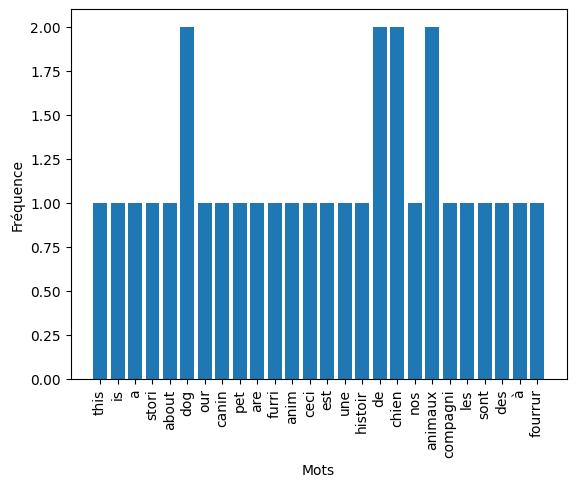

In [ ]:
# ...Suite de "Mieux visualiser "la compréhension du "SnowballStemmer" avec pandas":
import matplotlib.pyplot as plt

plt.bar(range(len(full_vocab)), list(full_vocab.values()), align='center')
plt.xticks(range(len(full_vocab)), list(full_vocab.keys()), rotation=90)
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.show()

# Remarque : la méthode du "SnowballStemmer" a tronqué les "e" de la fin de certains mots, Est-ce dûe à cause de la mixité des langues: Anglais/Français dans le texte d'origine?

# Méthode 2 du "Lemmatizer"

/ ! \ Attention, pour cette seconde étape, repars du texte nettoyé, mais pas du texte après stemmer. Le but de cet exercice est de comparer les deux méthodes

In [76]:
# On remet en string en utilisant le fct ".join" la tozénisation(tokens_words) faite de notre texte de départ(sentence):
# Commme > tokens_words= nltk.sent_tokenize(sentence)

string_mots = ' '.join(tokens_words)
string_mots

'this is a story about dogs our canine pets dogs are furry animals   ceci est une histoire de chiens nos animaux de compagnie  les chiens sont des animaux à fourrure'

In [77]:
#2) Le lemmatizer a-t-il permis de faire remonter des informations pertinentes en regroupant certains mots de même racine ?

import spacy
# Import des règles anglaises
nlp = spacy.load('en_core_web_sm')

# spacy découpe automatiquement en tokens avec cette syntaxe :
sent_tokens = nlp(string_mots)

for token in sent_tokens:
    print(token, token.lemma_)

# Remarque: Bête et méchant!:) la méthode du "lemmatizer"; permet à ce stade(ici) de trouver les pluriels de certains des mots, pas très pertinent pour un graphe comparatif!

this this
is be
a a
story story
about about
dogs dog
our our
canine canine
pets pet
dogs dog
are be
furry furry
animals animal
     
ceci ceci
est e
une une
histoire histoire
de de
chiens chien
nos nos
animaux animaux
de de
compagnie compagnie
   
les les
chiens chien
sont sont
des des
animaux animaux
à à
fourrure fourrure
